## Near State-of-the-art results at Object Recognition

In [44]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [2]:
import sys
import keras
print('python: {} ' .format(sys.version))
print('keras: {}'.format(keras.__version__))


python: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)] 
keras: 2.2.4


In [45]:
#Load the data
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

In [48]:
#lets detefmine the dataset characterstics
print('Training_images: {}'.format(X_train.shape))
print('Testing_images: {}'.format(X_test.shape))

Training_images: (50000, 32, 32, 3)
Testing_images: (10000, 32, 32, 3)


In [5]:
# A single image
print(X_train[0].shape)

(32, 32, 3)


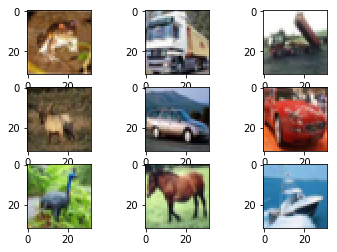

In [54]:
#Create a grid of 3x3

for i in range(0,9):
    plt.subplot(i + 1 + 330)
    img = X_train[i]
    
    plt.imshow(img)
    
#show the plot
plt.show()

In [7]:
#Preprocessing the dataset

#fixed random seed for reproducibility
seed = 6
np.random.seed()

#load the data
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

#Normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /=255.0
X_test /=255.0

In [8]:
#Class labels shape
print(Y_train.shape)
print(Y_train[0])

(50000, 1)
[6]


In [9]:
# [6] = [0,0,0,0,0,0,1,0,0,0] one hot vector

#hot encode output
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_class = Y_test.shape[1]
print(num_class)
print(Y_train.shape)
print(Y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
##Start by importing necessary libraries
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [24]:
##Definee the model fuction
def allcnn(weight = None):
    
    #define model type - Sequential
    model = Sequential()
    
    #Add model layers
    model.add(Conv2D(96, (3,3) ,padding ='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3,3),padding = 'same',strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3,3),padding ='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3,3),padding = 'same',strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3,3),padding ='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1,1),padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1,1),padding = 'valid'))

    
    ##Add GlobalAverage pooling layer with softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    ##Load the weights
    if weight:
        model.load_weights(weights)
        
        
    #Return the model
    return model

In [25]:
##Define hyper paremeters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

#build Model
model = allcnn()

#Define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov = True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#print model summary
print(model.summary())

#define additional training parameters
epochs = 350
batch_size = 32

#fit the model
model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs = epochs, batch_size=batch_size, verbose = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 192)       166080    
__________

KeyboardInterrupt: 

In [35]:
##Define hyper paremeters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

#build Model and define weights
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

#Define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov = True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#print model summary
print (model.summary())


#test the model with pretrained weight
scores =model.evaluate(X_test, Y_test, verbose = 1)
print('Accuracy: {}'.format(scores[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_35 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 192)       166080    
__________

In [85]:
#Make dictonary of class labels and names
classes = range(0,10)

names =['Airplane',
        'Automobile',
        'Bird',
        'Cat',
        'Deer',
        'Dog',
        'Frog',
        'Horse',
        'Ship',
        'Truck']

#zip the name and classes to make a dictonary of class labels
class_labels = dict(zip(classes,names))
print(class_labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


In [86]:
#Generate batch of nine images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis = -1)

#make predictions
predictions = model.predict(batch, verbose = 1)

9/9 [==============================] - 0s 16ms/step


In [87]:
print (predictions)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [88]:
#These are clss probabilities to class labels
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [89]:
#use np.max( )to convert class probabilities into class labels
class_result = np.argmax(predictions, axis=-1)
print (class_result)

[5 7 1 0 1 1 5 6 8]


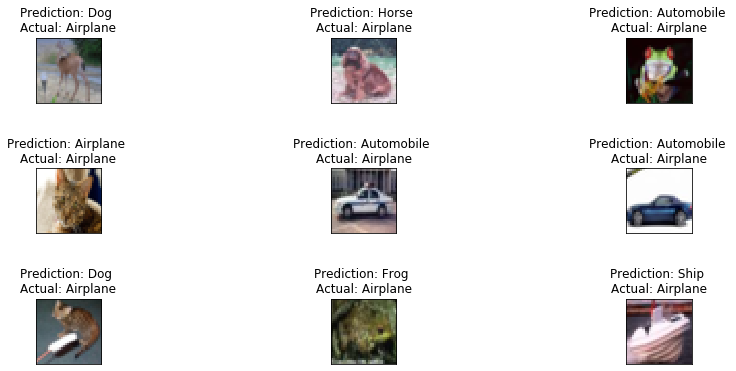

In [90]:
#Creste a grid of 3x3 image
fig, axs = plt.subplots(3,3, figsize = (15,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i ,img in enumerate(batch):
    #determine label for each prediction,set title
    for key,value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {} \nActual: {}'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
            
    #plot the img
    axs[i].imshow(img)
    
#show the plot
plt.show()